**서포트 벡터 머신(SVM)**
- 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델
- 복잡한 분류 문제에 잘 맞음, 작거나 중간 크기의 데이터셋에 적합

# 선형 SVM 분류

선형적으로 구분된 두 클래스

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

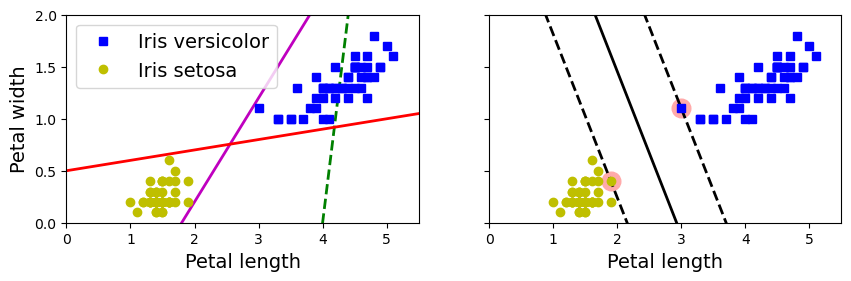

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

- 왼쪽 그래프에 세 개의 선형 분류기에서 만들어진 결정 경계가 보임
- 점선으로 나타난 결정 경계를 만든 모델은 클래스를 적절하게 분류하지 못하고 있음
- 다른 두 모델은 적절하게 분류하지만 결정 경계가 샘플에 너무 가까워 새로운 샘플에 대해서는 잘 작동하지 않을 것임

- 오른쪽 그래프에 있는 실선은 SVM 분류기의 결정 경계임
- 두 개의 클래스를 나누고 있을 뿐만 아니라 제일 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있음
- SVM 분류기를 클래스에 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있음
    - 그래서 **라지 마진 분류**라고 함

- 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않음
- 도로 경계에 위치한 샘플에 의해 전적으로 결정됨
    - 이런 샘플을 **서포트 벡터**라고 함

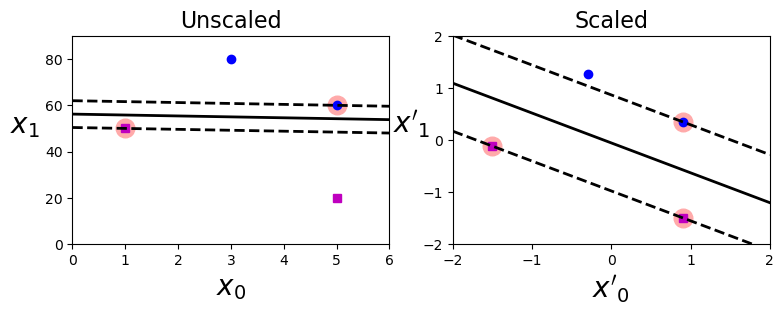

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

- SVM은 특성의 스케일에 민감함
- 왼쪽 그래프에서는 수직축의 스케일이 수평축의 스케일보다 훨씬 커서 가장 넓은 도로가 거의 수평에 가깝게 됨
- 특성의 스케일을 조정하면(StandardScaler) 결정 경계가 훨씬 좋아짐

## 소프트 마진 분류

모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 이를 **하드 마진 분류**라고 함

하드 마진 분류의 문제점
1. 데이터가 선형적으로 구분될 수 있어야 제대로 작동함
2. 이상치에 민감함

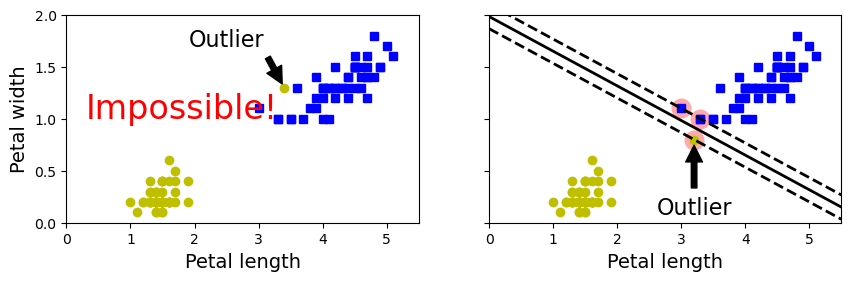

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

- 왼쪽그래프에서 이상치 하나가 있으므로 하드마진을 찾을 수 없음
- 오른쪽 그래프는 일반화가 잘될 것 같지 않음

---
유연한 모델이 필요함
- 도로의 폭을 가능한 한 넓게 유지하는 것과 **마진 오류** 사이에 적절한 균형을 잡아야함
    - **소프트 마진 분류**라고 함

- C가 이러한 하이퍼파라미터 중에 하나임
- C를 낮게 설정하면 왼쪽 그림과 같이 나타남
- 높게 설정하면 오른쪽 그림과 같이 나타남
- 마진 오류는 나쁘므로 일반적으로 적은 것이 좋음
- 왼쪽이 마진 오류가 많지만 일반화가 더 잘 된 것 같음

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\hansol\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

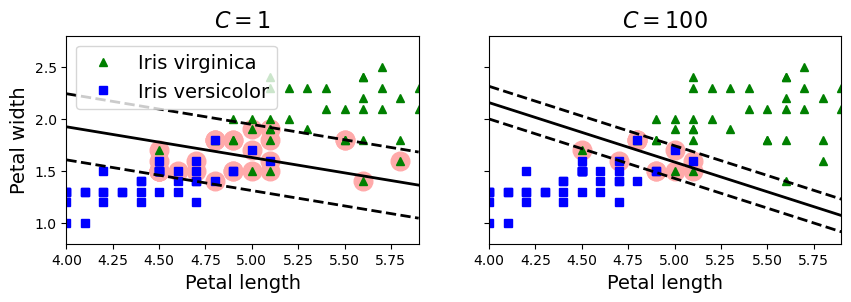

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
plt.show()

_모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있음_

- 사이킷런 코드는 붓꽃 데이터셋을 적재하고 특성 스케일을 변경하고 품종을 감지하기 위해 선형 SVM 모델을 훈련시킴

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

- SVM 분류기는 확률을 제공하지 않음

- LinearSVC 클래스를 대신 선형 컨널을 사용하는 SVC 클래스로 대체할 수 있음
- SVC 모델을 만들 때 `SVC(kernel="linear",C=1)`라고 씀
- `SGDClassifier(loss="hinge", alpha=1/(m*C))`와 같이 SGDClassifier 모델을 사용하는 것임
    - 선형 SVM 분류기를 훈련시키기 위해 일반적인 확률적 경사 하강법을 적용함
    - LinearSVC만큼 빠르게 수렴하지 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나, 온라인 학습으로 분류 문제를 다룰 때는 유용함

# 비선형 SVM 분류

- 선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만 선형적으로 분류할 수 없는 데이터셋이 많음
- 비선형 데이터셋을 닫루는 방법은 다항 특성과 같은 특성을 더 추가하는 것임
- 선형적으로 구분되는 데이터셋이 만들어질 수 있음


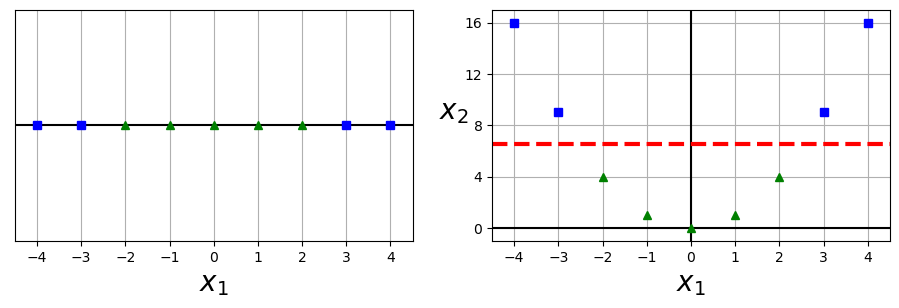

In [12]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

- 왼쪽은 선형으로 구분이 불가능 하지만, 오른쪽은 가능함
    - 특성을 추가했기 때문


- 사이킷런을 사용하여 이를 구현하려면 PolynomialFeatures 변환기와 StandardScaler, LinearSVC를 연결하여 Pipeline을 만듦

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

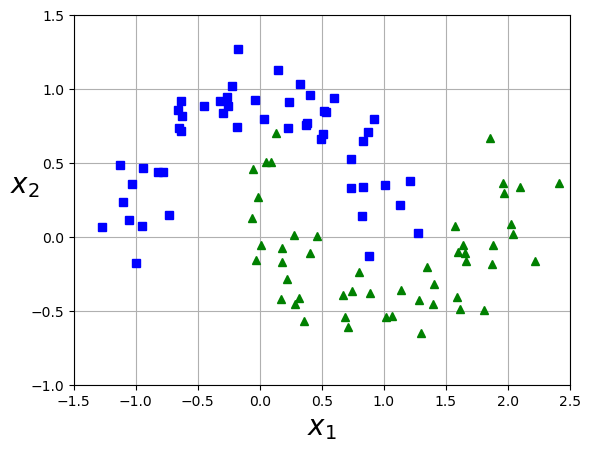

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

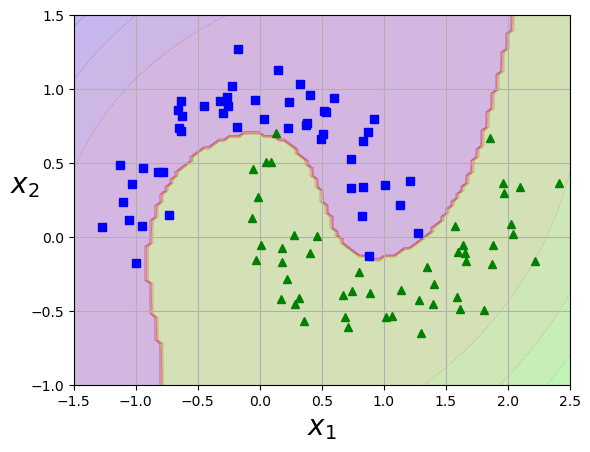

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## 다항식 커널
- 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동함
- 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만듦
---
- **커널 트릭**이라는 수학적 기교를 적용하여 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음
    - 특성을 추가하지 않았기 때문에 특성 조합이 생겨나지 않음

In [16]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [17]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

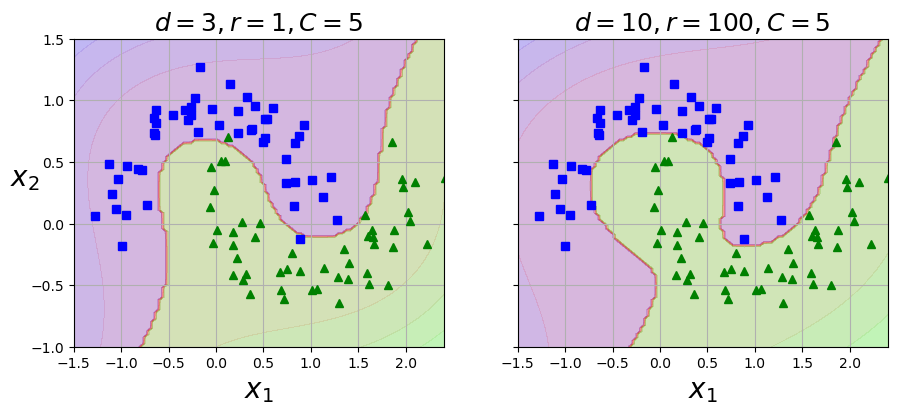

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

- 3차 다항식 커널을 사용해 SVM 분류기를 훈련시킴
- 오른쪽 그래프는 10차 다항식 커널을 사용한 또 다른 SVM 분류기임
- 모델이 과대적합이면 다항식의 차수를 줄여야함
- 반대로 과소적합이라면 차수를 늘려야함
- coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절함

## 유사도 특성

- 비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 **랜드마크**와 얼마나 닮았는지 측정하는 **유사도 함수**로 계산한 특성을 추가하는 것임
- 1차원 데이터셋에 두 개의 랜드마크 $x_1=-2, x_1=1$을 추가하겠음
- $\gamma=0.3$인 가우시안 **방사 기저 함수 (RBF)**를 유사도 함수로 정의하겠음

$$\phi_\gamma(x,l)=exp(-\gamma||x-l||^2)$$

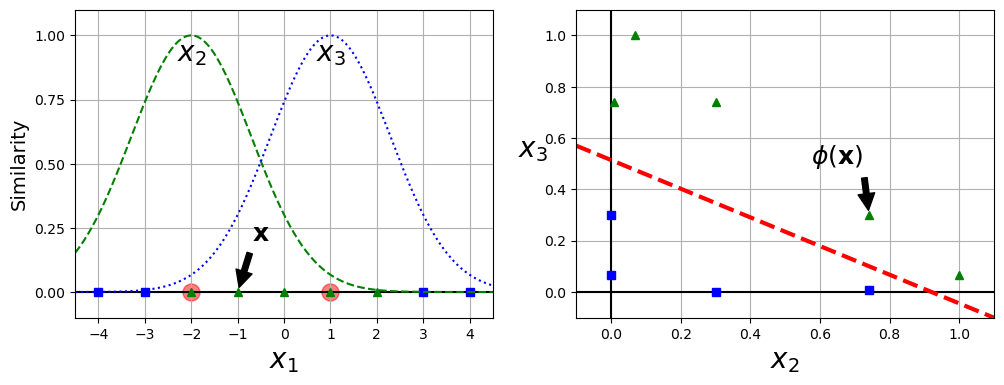

In [19]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

# save_fig("kernel_method_plot")
plt.show()

- 이 함수의 값은 0부터 1까지 변화하며 종 모양으로 나타냄
- 새로운 특성을 만들 준비가 되어있음

- 새로 만든 특성 $x_2, x_3$를 보았을 때 선형적으로 구분이 가능해짐

---
**랜드마크 선택방법**
- 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정함
    - 차원이 매우 커지므로 훈련 세트가 선형적으로 구분될 가능성이 있음
    - 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다는 것임
    

## 가우시안 RBF 커널

- 다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있음
- 추가 특을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련 세트가 클 경우 더 그럼
- 커널 트릭이 한 번 더 SVM의 마법을 만듦
- 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 얻을 수 있음
- 가우시간 RBF 커널을 사용한 SVC 모델을 시도해보겠음

In [20]:
rbf_kernel_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

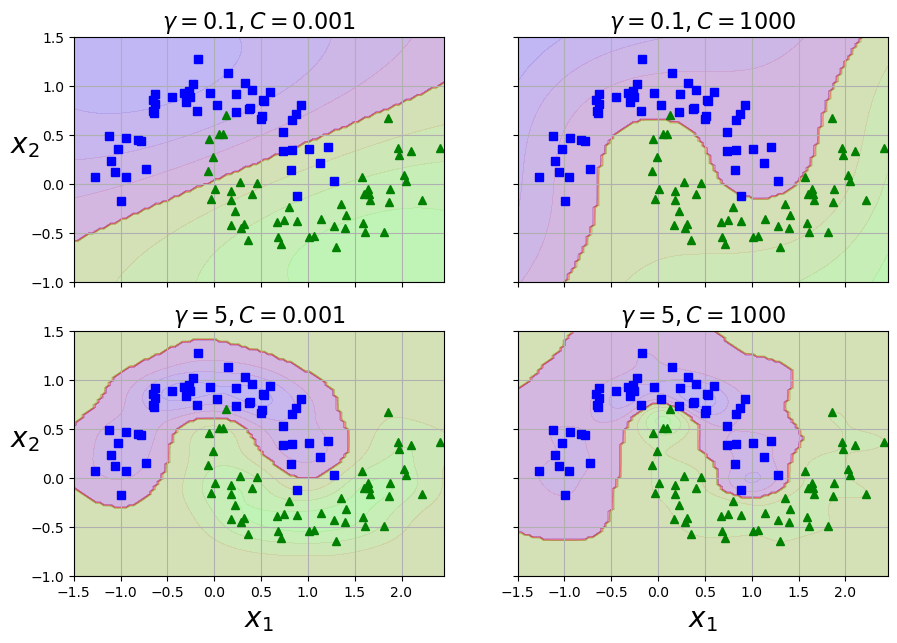

In [21]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

# save_fig("moons_rbf_svc_plot")
plt.show()

- gamma와 C를 바꾸어서 훈련시킨 모델임
- gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아짐
- 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어짐
- 반대로 작은 gamma 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워짐
- 하이퍼파라미터 gamma가 규제의 역할을 함
- 모델이 과대적합일 경우엔 감소시켜야하고 과소적합일 경우에는 증가시켜야함

---
- 다른 커널도 있지만 거의 사용하지 않음
- 어떤 커널은 특정 데이터 구조에 특화되어 있음
- **문자열 커널**이 가끔 텍스트 문서나 DNA 서열을 분류할 때 사용됨
    - **문자열 서브시퀀스 커널**이나 **레벤슈타인 거리**기반의 커널

## 계산 복잡도

- LinearSVC 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 함
- 이 라이브러리는 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어남
- 이 알고리즘의 훈련 시간 복잡도는 대략 $O(m\times n)$ 정도임

- 정밀도를 높이면 알고리즘의 수행 기간이 길어짐
- 이는 허용오차 하이퍼파리미터 $\epsilon$으로 조절함(사이킷런에서는 매개변수 tol)
- 대부분의 분류 문제는 허용오차를 기본값으로 두면 잘 작동함

- SVC는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 함
- 훈련의 시간 복잡도는 보통 $O(m^2\times n)$과 $O(m^3\times n)$사이임
    - 이는 훈련 샘플 수가 커지면 엄청나게 느려진다는 것을 의미함
- 복잡하지만 작거나 중간 규모의 훈련 세트에 이 알고리즘이 잘 맞음
- 특성의 개수에는, 특히 **희소 특성**인 경우에는 잘 확장됨
- 이런 경우 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례함

|파이썬 클래스|시간 복잡도|외부 메모리 학습 지원|스케일 조정의 필요성|커널 트릭|
|---|---|---|---|---|
|LinearSVC|$O(m\times n)$|아니오|예|아니오|
|SGDClassifier|$O(m\times n)$|예|예|아니오|
|SVC|$O(m^2\times n)$ ~ $O(m^3\times n)$|아니오|예|예|

# SVM 회귀

SVM 알고리즘은 다목적으로 사용할 수 있음
- 선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용할 수 있음
- SVM을 분류가 아니라 회귀에 적용하는 방법은 목표를 반대로 하는 것임
- 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습함
- 도로의 폭은 $\epsilon$으로 조절함
- 무작위로 생성한 선형 데이터셋에 훈련시킨 두 개의 선형 SVM 회귀 모델을 보여줌
- 하나는 마진을 크게($\epsilon=1.5$)하고 다른 하나는 마진을 작게($\epsilon=0.5$)하여 만들었음

In [22]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [23]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [24]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

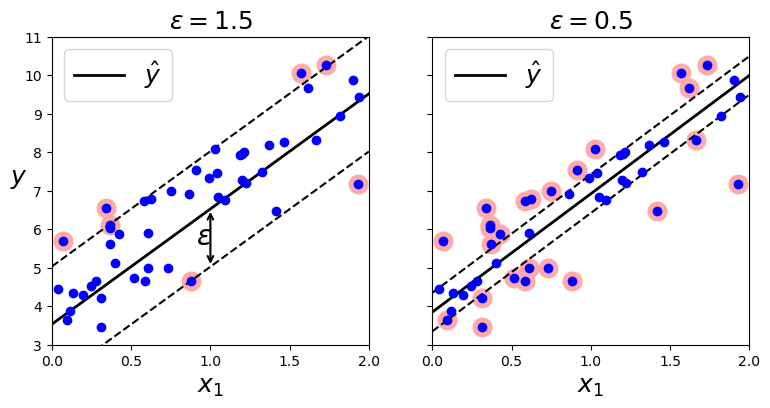

In [25]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

- 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없음
    - 그래서 이 모델을 **$\epsilon$에 민감하지 않다**고 말할 수 있음

- 사이킷런의 LinearSVR을 사용해 선형 SVM 회귀를 적용해보겠음

In [26]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X ,y)

LinearSVR(epsilon=1.5)

In [27]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [28]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [29]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

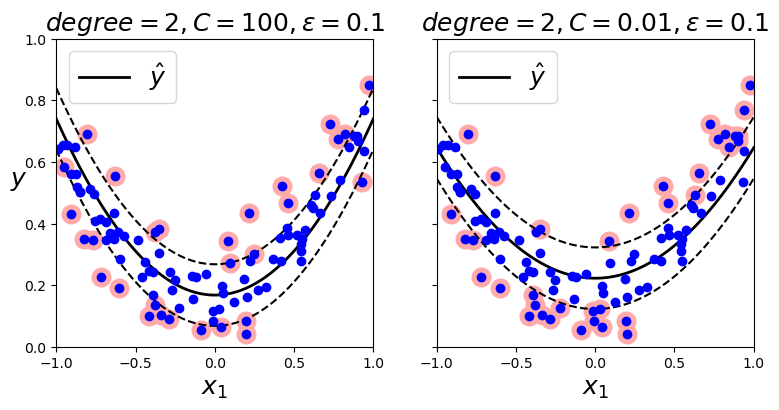

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()

- 비선형 회귀 작업을 처리하려면 커널 SVM 모델을 사용함
- 위 그래프는 임의의 2차방정식 형태의 훈련 세트에 2차 다항 커널을 사용한 SVM 회귀를 보여줌
- 왼쪽 그래프는 규제가 거의 없고, 오른쪽 그래프는 규제가 훨씬 많음

In [31]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

- SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀 버전임
- LinearSVR은 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어남
- 하지만 SVR은 훈련 세트가 커지면 훨씬 느려짐

# SVM 이론

SVM의 예측은 어떻게 이뤄지는지, SVM의 훈련 알고리즘이 어떻게 작동하는지 설명하겠음

## 결정 함수와 예측

- 선형 SVM 분류기 모델은 단순히 결정 함수 $w^Tx + b = w_1x_1+\cdots+w_nx_x+b$를 계산해서 새로운 샘플 x의 클래스를 예측함
- 결과값이 0보다 크면 예측된 클래스 $\hat{y}$은 양성 클래스(1)가 됨
    - 그렇지 않으면 음성 클래스(0)이 됨


$$\hat{y}=\begin{cases}
0 & w^Tx + b < 0 일 때 \\
1 & w^Tx + b \ge 0 일 때
\end{cases}$$

In [32]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

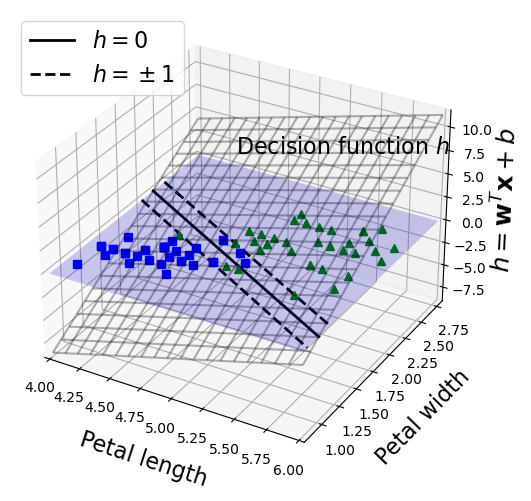

In [33]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

# save_fig("iris_3D_plot")
plt.show()

- 오른쪽에 있는 모델의 결정 함수가 나타나 있음
- 특성이 두 개인 데이터셋이기 때문에 2차원 평면임
- 결정 경계는 결정 함수의 값이 0인 점들로 이루어져 있음

- 점선은 결정 함수의 값이 1 또는 -1인 점들을 나타냄
- 이 선분은 결정 경계에 나란하고 일정한 거리만큼 떨어져서 마진을 형성하고 있음
- 선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생하지 않거나 제한적인 마진 오류를 가지면서 가능한 한 마진을 크게 하는 w와 b를 찾는 것임

## 목적 함수

- 결정 함수의 기울기를 생각해보면 이는 가중치 벡터의 노름 $||w||$와 같음
- 이 기울기를 2로 나누면 결정 함수의 값이 $\pm1$이 되는 점들이 결정 경계로부터 2배만큼 더 멀어짐
- 즉, 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같음

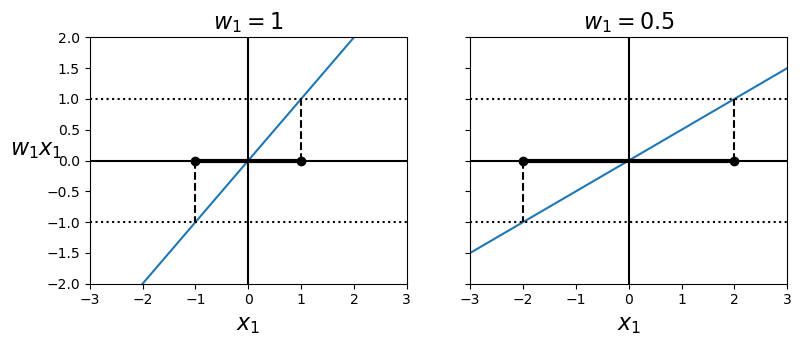

In [34]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
# save_fig("small_w_large_margin_plot")
plt.show()

- 마진을 크게 하기 위해 $||w||$를 최소화하려고 함
- 마진 오류를 하나도 만들지 않으려면(하드 마진), 결정 함수가 모든 양성 훈련 샘플에서는 1보다 커야 하고 음성 훈련 샘플에서는 -1보다 작아야 함
- 음성 샘플($y^{(i)}=0$)일 때 $t^{(i)}=-1$로, 양성 샘플($y^{(i)}=1$)일 때 $t^{(i)}=1$로 정의하면 앞서 말한 제약 조건을 모든 샘플에서 $t^{(i)}(w^Tx^{(i)}+b)\ge1$로 표현할 수 있음

- 그러므로 하드 마진 선형 SVM 분류기의 목적 함수를 최적화 문제로 표현할 수 있음

$$ \mbox{minimize} \frac{1}{2}w^Tw $$
$$ [조건] i = 1,2,\cdots,m \mbox{일 때} \qquad t^{(i)}(w^Tx^{(i)}+b)\ge1$$

- 소프트 마진 분류기의 목적 함수를 구성하려면 각 샘플에 대해 **슬랙 변수** $\zeta^{(i)}\ge0$을 도입해야함
- $\zeta^{(i)}$는 i번째 샘플이 얼마나 마진을 위반할지 정함
- 이 문제는 두 개의 상충되는 목표를 가지고 있음
- 마진 오류를 최소화하기 위해 가능한 한 슬랙 변수의 값을 작게 만드는 것과 마진을 크게 하기 위해 $\frac{1}{2}w^Tx$를 가능한 한 작게 만드는 것임
- 여기에 하이퍼파리미터 C를 사용
- 이 파라미터는 두 목표 사이의 트레이드오프를 정의함

$$*소프트 마진 선형 SVM 분류기의 목적 함수*$$
$$\mbox{minimize} \frac{1}{2}w^Tw+C\sum^m_{i=1}\zeta^{(i)}$$
$$[조건] i = 1,2,\cdots,m \ 일 때\qquad t^{(i)}(w^Tx^{(i)}+b)\ge1-\zeta^{(i)}이고 \zeta^{(i)}\ge0$$

## 콰드라틱 프로그래밍

- 하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제임
- 이런 문제를 **콰드라틱 프로그래밍**문제라고 함
- 여러 가지 테크닉으로 QP 문제를 푸는 알고리즘이 많이 있음

$$일반적인 공식$$


$$\mbox{minimize}\frac{1}{2}p^THp+f^Tp$$


$$[조건]Ap\le b$$


$$ 여기서 \begin{cases}
p는 n_p 차원의 벡터(n_p = 모델 파라미터 수)\\
H는 n_p \times n_p 크기 행렬\\
f는 n_p 차원의 벡터\\
A는 n_c \times n_p 크기 행렬 (n_c = 제약 수)\\
b는 n_c 차원의 벡터
\end{cases}$$

## 쌍대 문제

- **원 문제(primal problem)**라는 제약이 있는 최적화 문제가 주어지면 **쌍대 문제(dual problem)**라고 하는 깊게 관련된 다른 문제로 표현할 수 있음
- 일반적으로 쌍대 문제 해는 원 문제 해의 하한값이지만, 어떤 조건하에서는 원 문제와 똑같은 해를 제공함
- 다행히도 SVM 문제는 이 조건을 만족시킴
- 따라서 원 문제 또는 쌍대 문제 중 하나를 선택하여 풀 수 있음
    - 둘 다 같은 해를 제공함

$$ *선형 SVM 목적 함수의 쌍대 형식* $$


$$ \mbox{minimize}\frac{1}{2}\sum^m_{i=1}\sum^m_{j=1}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}x^{(i)^T}x^{(j)}-\sum^m_{(i)}\alpha^{(i)}$$


$$[조건] i=1,2,\cdots,m \ 일 때\qquad \alpha^{(i)} \ge 0 $$

- 이 식을 최소화하는 벡터 $\hat{\alpha}$을 찾았다면 원 문제의 식을 최소화하는 $\hat{w}$과 $\hat{b}$를 계산할 수 있음

$$*쌍대 문제에서 구한 해로 원 문제의 해 계산하기*$$

$$\hat{w} = \sum^m_{i=1}\hat{\alpha}^{(i)}t^{(i)}x^{(i)}$$

$$\hat{b} = \frac{1}{n_s}\sum^m_{i=1}(t^{(i)}-\hat{w}^Tx^{(i)}) \qquad 단\ (\hat{\alpha}^{(i)}>0)$$

- 훈련 샘플 수가 특성 개수보다 작을 때 원 문제보다 쌍대 문제를 푸는 것이 더 빠름
- 더 중요한 것은 원 문제에서는 적용이 안 되는 커널 트릭을 가능하게 함

## 커널 SVM

2차원 데이터셋에 2차 다항식 변환을 적용하고 선형 SVM 분류기를 변환된 이 훈련 세트에 적용한다고 하자

매핑함수 $\phi$

$$\phi(x)=\phi\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix}x_1^2 \\ \sqrt{2}x_1x_2 \\ x_2^2\end{pmatrix}$$

- 변환된 벡터는 2차원이 아니고 3차원이 됨

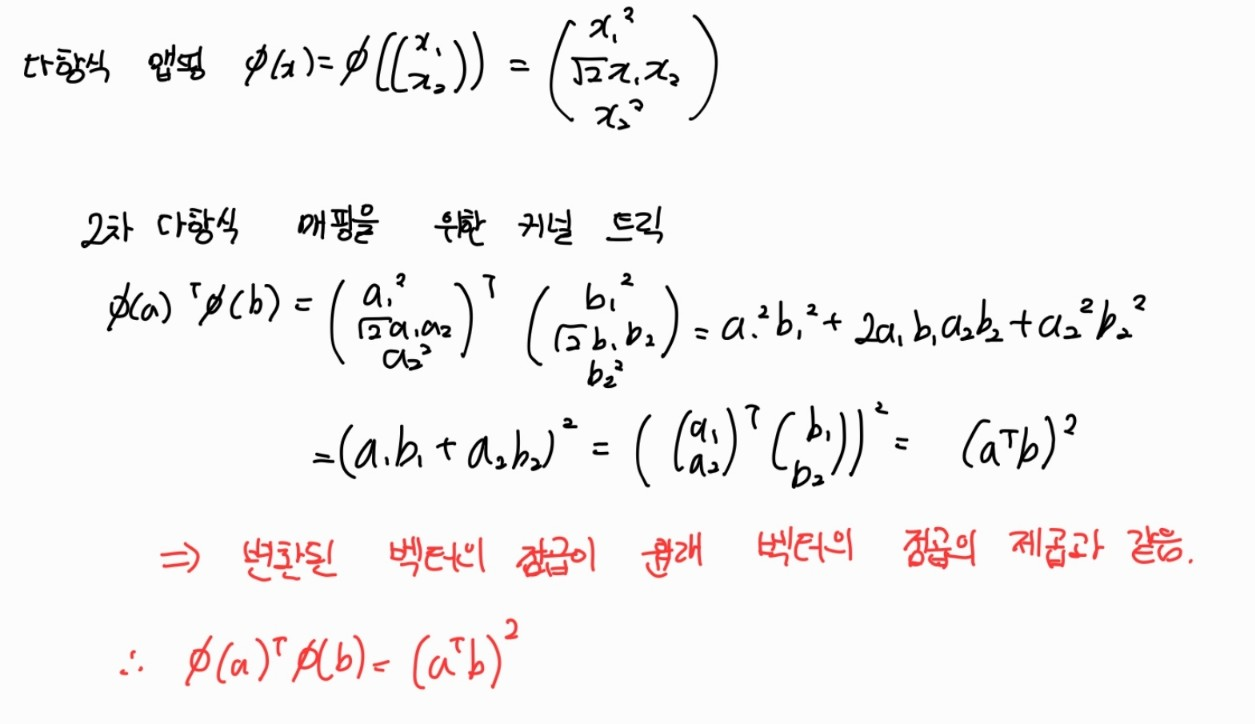

모든 훈련 샘플에 변환 $\phi$를 적용하면 쌍대 문제에 점곱 $phi(x^{(i)})^T\phi(x^{(j)})$가 포함됨
- 하지만 $\phi$가 2차 다항식의 변환이라면 변환된 벡터의 점곱을 간단하게 $(x^{(i)^T}x^{(j)})^2$으로 바꿀 수 있음
    - 즉 실제로 훈련 샘플을 변환할 필요가 전혀 없음
    - 결과값은 실제로 훈련 샘플을 어렵게 변환해서 선형 SVM 알고리즘을 적용하는 것과 완전히 같음
    

- 함수 $K(a,b)=(a^Tb)^2$을 2차 **다항식 커널**이라고 부름
- 머신러닝에서 **커널**은 변환 $\phi$를 계산하지 않고 원래 벡터 a와 b에 기반하여 점곱 $\phi(a)^T\phi(b)$를 계산할 수 있는 함수임

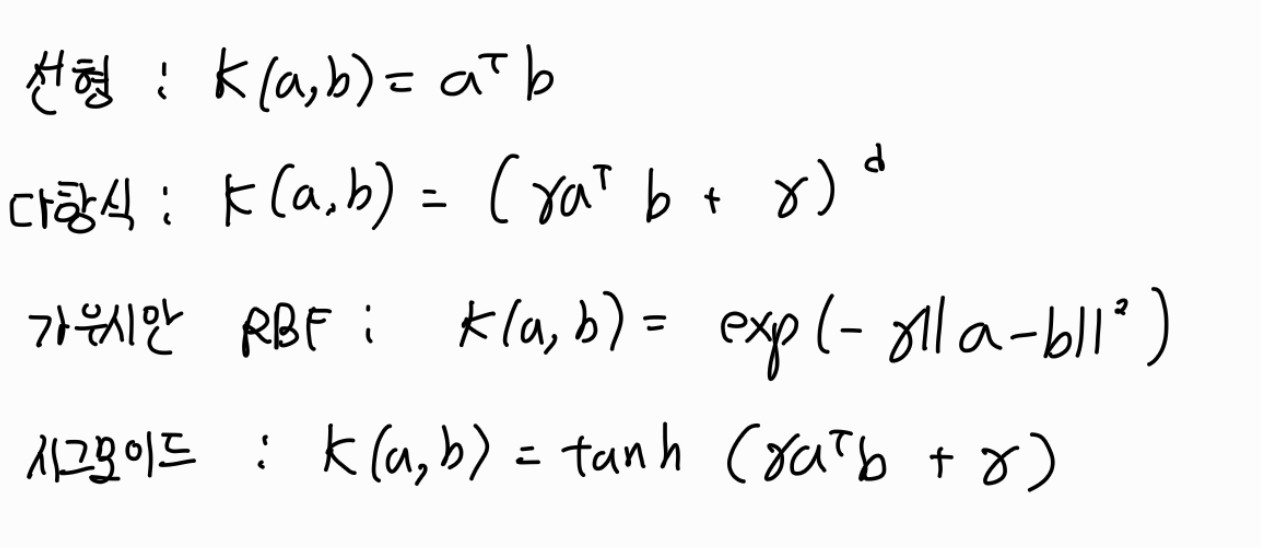

<font color="blue">머서의 정리</font>
- **머서의 정리**에 따르면 함수 K(a,b)가 **머서의 조건**이라 부르는 몇 개 수학적 조건을 만족할 때 a와 b를 다른 공간에 매핑하는 $K(a,b)=\phi(a)^T\phi(b)$와 같은 함수 $\phi$가 존재함
    - 따라서 $\phi$를 모르더라도 존재하는 것을 알기 때문에 K를 커널로 사용할 수 있음

---
- SVM 분류기일 경우 쌍대 문제를 풀어서 원 문제를 해결하는 방법을 알려줌
- 하지만 커널 트릭을 사용한다면 결국 예측 식에 $\phi(x^{(i)})$를 포함해야 함
- $\hat{w}$의 차원이 매우 크거나 무한한 $\phi(x^{(i)})$의 차원과 같아져야 하므로 이를 계산할 수 없음
- 다행히 $\hat{w}$에 대한 식을 새로운 샘플 $x^{(n)}$의 결정 함수에 적용해서 입력 베터 간의 점곱으로만된 식을 얻을 수 있음
    - 커널 트릭을 사용할 수 있음

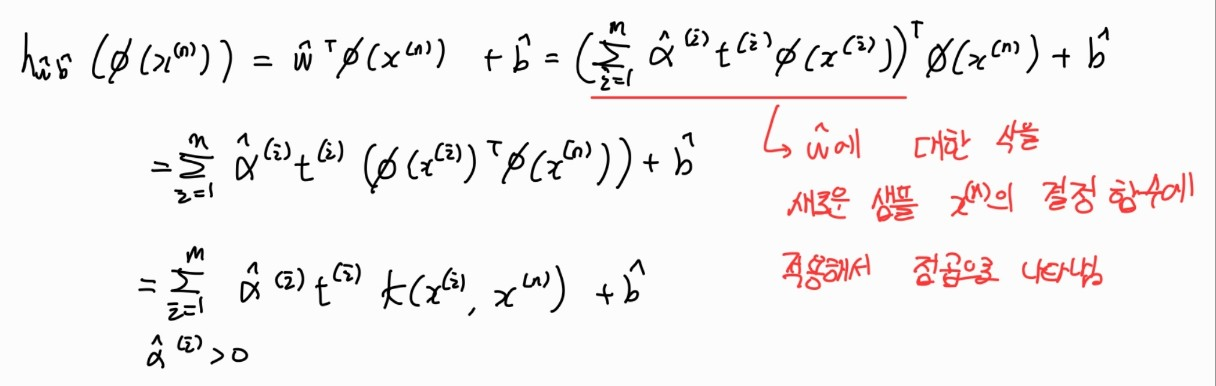

- 서포트 벡터만 $\alpha^{(i)}\neq0$이기 때문에 예측을 만드는 데는 전체 샘플이 아니라 서포트 벡터와 새 입력 벡터 $x^{(n)}$간의 점곱만 계산하면 됨
- 물론 편향 $\hat{b}$도 커널 트릭을 사용해 계산해야 함

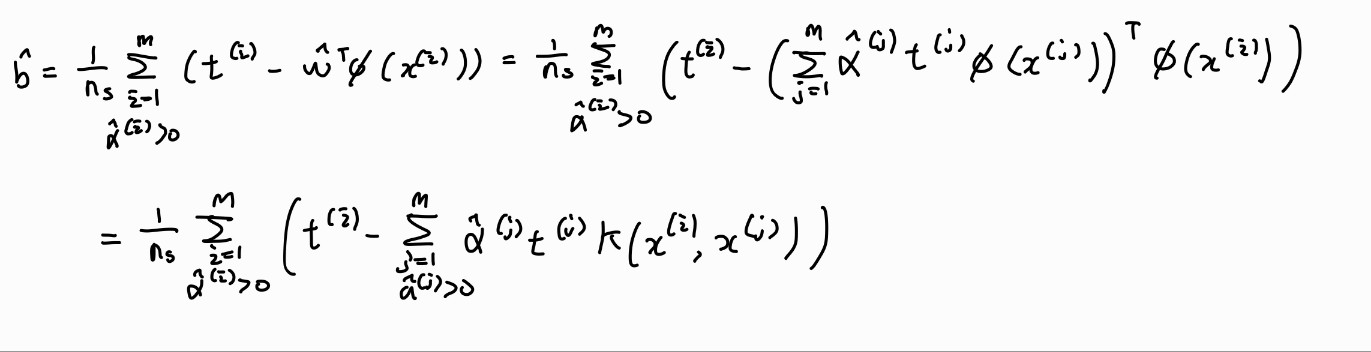

## 온라인 SVM

온라인 SVM 분류기를 구현하는 한 가지 방법은 원 문제로부터 유도된 비용 함수를 최소화하기 위한 경사 하강법을 사용하는 것
- 하지만 경사 하강법은 QP 기반의 방법보다 훨씬 느리게 수렴함

$$J(w,b)=\frac{1}{2}w^Tw+C\sum^m_{i=1}\mbox{max}(0,1-t^{(i)}(w^Tx^{(i)}+b))$$

- 이 비용 함수의 첫번째 항은 모델이 작은 가중치 벡터 w를 가지도록 제약을 가해 마진을 크게 만듦
- 두 번째 항은 모든 마진 오류를 계산함
- 어떤 샘플이 도로에서 올바른 방향으로 벗어나 있으면 마진 오류는 0
- 그렇지 않다면 마진 오류는 올바른 방향의 도로 경계선까지의 거리에 비례
    - 이 항을 최소화 하면 마진 오류를 가능한 한 줄이고 크기도 작게 만듦

<font color="blue">힌지 손실</font>

$\mbox{max}(0,1-t)$함수를 **힌지 손실** 함수라고 부름
- 이 함수는 $t\ge1$일 때 0임
- 이 함수의 도함수는 t < 1 이면 -1 이고 t > 1 이면 0임
- t = 1에서 미분 가능하지 않지만 t = 1 에서 **서브그레이언트**사용해 경사 하강법을 사용할 수 있음

- 대규모의 비선형 문제라면 신경망 알고리즘을 고려하는 것도 좋음